### Predicting sentiment from product reviews
The goal of this assignment is to explore logistic regression and feature engineering with existing Turi Create functions.
In this assignment, you will use product review data from Amazon.com to predict whether the sentiments 
about a product (from its reviews) are positive or negative

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("amazon_baby.csv")

In [3]:
data.shape

(183531, 3)

In [4]:
len(data)

183531

In [5]:
data.isna().sum()

name      318
review    829
rating      0
dtype: int64

In [6]:
data.columns

Index(['name', 'review', 'rating'], dtype='object')

In [7]:
data.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
data.describe()

,rating
count,183531.000000
mean,4.120448
std,1.285017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


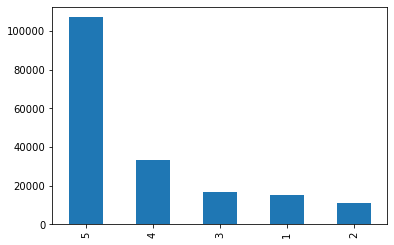

In [10]:
data.rating.value_counts().plot.bar();

In [11]:
# Perform text cleaning
z=data['review'][:1]

In [12]:
def remove_punct(txt):
    import string 
    for c in string.punctuation:
        txt= txt.replace(c,"")
    
    return txt

In [13]:
data.review.dtypes

dtype('O')

In [14]:
data['review'].fillna(data['review'].mode().values[0], inplace = True)

In [15]:
data["review_clean"] = data['review'].str.replace('[./^&*(*)123ABC {}]"','')

In [16]:
data["review_clean"]

0         These flannel wipes are OK, but in my opinion ...
1         it came early and was not disappointed. i love...
2         Very soft and comfortable and warmer than it l...
3         This is a product well worth the purchase.  I ...
4         All of my kids have cried non-stop when I trie...
                                ...                        
183526    Such a great idea! very handy to have and look...
183527    This product rocks!  It is a great blend of fu...
183528    This item looks great and cool for my kids.......
183529    I am extremely happy with this product. I have...
183530    I love this product very mush . I have bought ...
Name: review_clean, Length: 183531, dtype: object

In [17]:
data['review'].fillna(data['review'].mode().values[0], inplace = True)


In [18]:
data['name'].fillna(data['name'].mode().values[0], inplace = True)

In [19]:
data['name']

0                                  Planetwise Flannel Wipes
1                                     Planetwise Wipe Pouch
2                       Annas Dream Full Quilt with 2 Shams
3         Stop Pacifier Sucking without tears with Thumb...
4         Stop Pacifier Sucking without tears with Thumb...
                                ...                        
183526    Baby Teething Necklace for Mom Pretty Donut Sh...
183527    Baby Teething Necklace for Mom Pretty Donut Sh...
183528     Abstract 2 PK Baby / Toddler Training Cup (Pink)
183529    Baby Food Freezer Tray - Bacteria Resistant, B...
183530    Best 2 Pack Baby Car Shade for Kids - Window S...
Name: name, Length: 183531, dtype: object

In [20]:
data.isna().sum()

name            0
review          0
rating          0
review_clean    0
dtype: int64

In [21]:
data['review'][:5]

0    These flannel wipes are OK, but in my opinion ...
1    it came early and was not disappointed. i love...
2    Very soft and comfortable and warmer than it l...
3    This is a product well worth the purchase.  I ...
4    All of my kids have cried non-stop when I trie...
Name: review, dtype: object

In [22]:
data[data['rating']!=3]

,name,review,rating,review_clean
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed. i love...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase. I ...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried non-stop when I trie...
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"When the Binky Fairy came to our house, we did..."
...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,Such a great idea! very handy to have and look...
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,This product rocks! It is a great blend of fu...
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,This item looks great and cool for my kids.......
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,I am extremely happy with this product. I have...


 ### Extract Sentiments
*  We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment

In [23]:
data['sentiment']=data['rating'].apply(lambda x:+1 if x>3 else -1 )

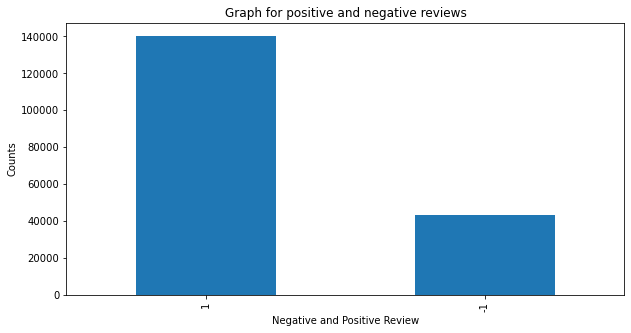

In [24]:
data.sentiment.value_counts().plot.bar(figsize=(10,5));
plt.xlabel("Negative and Positive Review")
plt.ylabel("Counts")
plt.title("Graph for positive and negative reviews");

In [25]:
data.head(5)

,name,review,rating,review_clean,sentiment
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"These flannel wipes are OK, but in my opinion ...",-1
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed. i love...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase. I ...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried non-stop when I trie...,1


### Modeling

In [26]:
X=data.drop(['sentiment','review'],axis=1)
y=data.sentiment


In [27]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)


In [28]:
len(xtrain),len(ytrain),len(xtest),len(ytest)

(146824, 146824, 36707, 36707)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
     # Use this token pattern to keep single-letter words
# First, learn vocabulary from the training data and assign columns to words
# Then convert the training data into a sparse matrix
train_matrix = vectorizer.fit_transform(xtrain['review_clean'])
# Second, convert the test data into a sparse matrix, using the same word-column mapping
test_matrix = vectorizer.transform(xtest['review_clean'])


In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(train_matrix, ytrain)


C:\Users\Ibrahem.Nofal\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
clf.score(test_matrix,ytest)

0.884245511755251

In [32]:
y_preds=clf.predict(test_matrix)

In [33]:
y_preds

array([-1, -1,  1, ...,  1,  1,  1], dtype=int64)

In [60]:
clf.coef_ > 0

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False, False, False, False, False, False, False,
        False, False]])

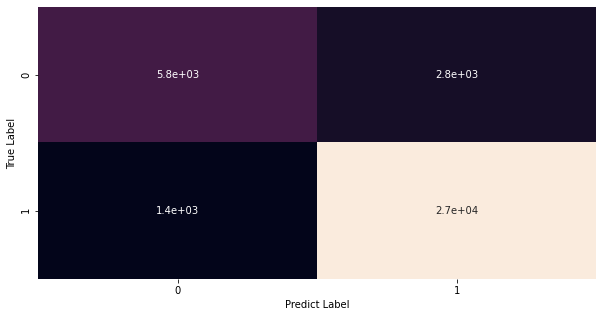

In [35]:
# Create a more visual confusion matrix
###
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Make confusion matrix more visual
def plot_con_mat(ytest,y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig,ax=plt.subplots(figsize=(10,5))
    ax=sns.heatmap(confusion_matrix(ytest,y_preds)
                   ,annot=True,
                   cbar=False)
    plt.xlabel("Predict Label")
    plt.ylabel("True Label")

plot_con_mat(ytest,y_preds)

In [36]:
confusion_matrix(ytest,y_preds)

array([[ 5831,  2847],
       [ 1402, 26627]], dtype=int64)

In [37]:
# Import confusion_matrix and classification_report from sklearn's metrics module
###
from sklearn.metrics import classification_report
# Import precision_score, recall_score and f1_score from sklearn's metrics module
###
from sklearn.metrics import precision_score,f1_score,recall_score
# Import plot_roc_curve from sklearn's metrics module
###
from sklearn.metrics import plot_roc_curve

In [38]:
# Create a classification report using the classification_report function
###
print(classification_report(ytest,y_preds))

              precision    recall  f1-score   support

          -1       0.81      0.67      0.73      8678
           1       0.90      0.95      0.93     28029

    accuracy                           0.88     36707
   macro avg       0.85      0.81      0.83     36707
weighted avg       0.88      0.88      0.88     36707



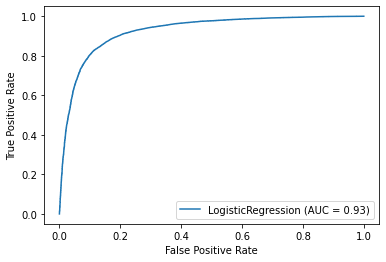

In [39]:
# Plot a ROC curve using our current machine learning model using plot_roc_curve
###
plot_roc_curve(clf,test_matrix,ytest);

In [40]:
# Import cross_val_score from sklearn's model_selection module
###
from sklearn.model_selection import cross_val_score
cross_val_score(clf,test_matrix,ytest,cv=5,scoring="accuracy")

C:\Users\Ibrahem.Nofal\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ibrahem.Nofal\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

array([0.87115227, 0.8726505 , 0.86963629, 0.86772919, 0.86963629])

In [41]:
X_matrix = vectorizer.fit_transform(X['review_clean'])


In [42]:
# gives a cross-validated version of the scoring metric.
cross_val_acc = np.mean(cross_val_score(clf,
                                        X_matrix,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

C:\Users\Ibrahem.Nofal\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ibrahem.Nofal\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

0.8847497202807697

In [43]:
# Find the cross-validated precision
###
cross_val_score(clf,X_matrix,y,cv=5,scoring="precision")
crv=np.mean(cross_val_score(clf,X_matrix,y,cv=5,scoring="precision")
)
crv,cross_val_score(clf,X_matrix,y,cv=5,scoring="precision")


C:\Users\Ibrahem.Nofal\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ibrahem.Nofal\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

(0.906339385500492,
 array([0.90704997, 0.90343399, 0.90704601, 0.90833447, 0.90583249]))

In [44]:
sample_test_data = xtest[10:13]
print (sample_test_data)

                                                     name  rating  \
100691  Seventh Generation Chlorine Free Baby Wipes Re...       5   
177304          BABYBJORN Baby Carrier One, Black, Cotton       5   
181655  JollyPop Pacifiers PREEMIE Size FOR PREMATURE ...       5   

                                             review_clean  
100691  I have been buying Seventh Generation products...  
177304  The Baby Bjorn One is great for both newborns ...  
181655  FINALLY a preemie pacifier that doesn't smell ...  


In [62]:
data.tail(20)

,name,review,rating,review_clean,sentiment
183511,Maxboost iPhone 5S/5 Case - Protective Snap-on...,I received a free sample from VIPU program for...,3,I received a free sample from VIPU program for...,-1
183512,Maxboost iPhone 5S/5 Case - Protective Snap-on...,*I received a free sample from VIPU program fo...,5,*I received a free sample from VIPU program fo...,1
183513,Maxboost iPhone 5S/5 Case - Protective Snap-on...,I was a very surprised by the quality of this ...,5,I was a very surprised by the quality of this ...,1
183514,Maxboost iPhone 5S/5 Case - Protective Snap-on...,I received a free sample from VIPU program for...,4,I received a free sample from VIPU program for...,1
183515,Maxboost iPhone 5S/5 Case - Protective Snap-on...,I love this phone case! My iPhone is always ...,5,I love this phone case! My iPhone is always ...,1
183516,BoogieBulb&reg; - The First True Cleanable &am...,I've ordered a ton of &#34;suckers&#34; to try...,3,I've ordered a ton of &#34;suckers&#34; to try...,-1
183517,"Baby Mucus Extractor, Nasal Aspirator From Dr....",I recieved this product free of charge and abs...,5,I recieved this product free of charge and abs...,1
183518,"Baby Mucus Extractor, Nasal Aspirator From Dr....","The tube is soft and easy to use, and the tip ...",5,"The tube is soft and easy to use, and the tip ...",1
183519,"Baby Mucus Extractor, Nasal Aspirator From Dr....",I love this so much. It works way better than ...,5,I love this so much. It works way better than ...,1
183520,"Baby Mucus Extractor, Nasal Aspirator From Dr....",The aspirator works well but needs to come wit...,4,The aspirator works well but needs to come wit...,1


### Learn another classifier with fewer words

In [45]:
 significant_words= ['love', 'great', 'easy', 'old', 'little', 'perfect', 'loves', 
      'well', 'able', 'car', 'broke', 'less', 'even', 'waste', 'disappointed', 
      'work', 'product', 'money', 'would', 'return']

In [46]:
vectorizer_word_subset = CountVectorizer(vocabulary=significant_words) # limit to 20 words
train_matrix_word_subset = vectorizer_word_subset.fit_transform(xtrain['review_clean'])
test_matrix_word_subset = vectorizer_word_subset.transform(xtest['review_clean'])

In [47]:
train_matrix_word_subset


<146824x20 sparse matrix of type '<class 'numpy.int64'>'
	with 324218 stored elements in Compressed Sparse Row format>

In [48]:
clf.fit(train_matrix_word_subset,ytrain)

LogisticRegression(random_state=0)

In [49]:
clf.predict(test_matrix_word_subset)

array([-1, -1,  1, ...,  1,  1,  1], dtype=int64)

In [50]:
clf.coef_

array([[ 1.06499846,  0.72582894,  0.83686111,  0.07310907,  0.24046591,
         1.25733428,  1.39174306,  0.35351106,  0.06994783,  0.03622734,
        -1.39232471, -0.19936892, -0.37114696, -1.6963816 , -2.08852145,
        -0.57262783, -0.22089188, -0.62284609, -0.35000772, -1.77250145]])

In [51]:
simple_model_coef_table = pd.DataFrame({'word':significant_words,
                                         'coefficient':clf.coef_.flatten()})

In [52]:
simple_model_coef_table.reset_index()

,index,word,coefficient
0,0,love,1.064998
1,1,great,0.725829
2,2,easy,0.836861
3,3,old,0.073109
4,4,little,0.240466
5,5,perfect,1.257334
6,6,loves,1.391743
7,7,well,0.353511
8,8,able,0.069948
9,9,car,0.036227


In [53]:
simple_model_coef_table.sort_values(by=['coefficient'],ascending=True)

,word,coefficient
14,disappointed,-2.088521
19,return,-1.772501
13,waste,-1.696382
10,broke,-1.392325
17,money,-0.622846
15,work,-0.572628
12,even,-0.371147
18,would,-0.350008
16,product,-0.220892
11,less,-0.199369


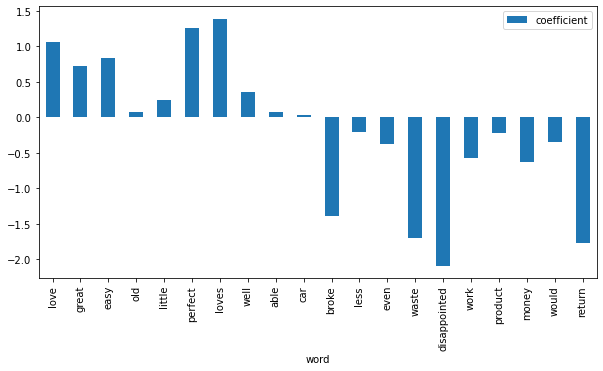

In [54]:
simple_model_coef_table.plot.bar(x='word',y='coefficient',figsize=(10,5));

In [55]:
clf.score(test_matrix_word_subset,ytest)

0.797177650039502

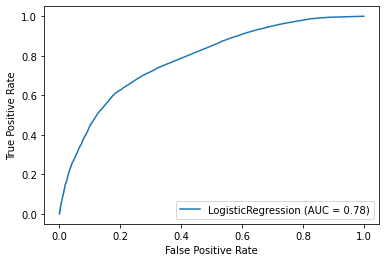

In [57]:
plot_roc_curve(clf,test_matrix_word_subset,ytest);

In [58]:
import graphlab


ModuleNotFoundError: No module named 'graphlab'

In [59]:
data['review'].value_counts()

Very good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         834
very nice                                                                                                                                                                                         